In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
iris=load_iris()

In [3]:
x = iris.data

In [4]:
y = iris.target

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [6]:
x_train.shape

(112, 4)

In [7]:
y_train.shape

(112,)

In [8]:
x_test.shape

(38, 4)

In [9]:
 model = DecisionTreeClassifier()

In [10]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
pred = model.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(y_test,pred)*100

86.8421052631579

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {
    'max_depth':[2,3,4,5,6],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[2,3,4]
}

In [16]:
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [17]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]})

In [18]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

In [19]:
grid_search.best_params_

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [20]:
grid_search.best_score_

0.9636363636363636

In [21]:
model2 = DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,min_samples_split=2)

In [22]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [23]:
pred2 = model2.predict(x_test)

In [24]:
accuracy_score(y_test,pred2)*100

94.73684210526315

In [25]:
model.score(x_train,y_train)

1.0

In [26]:
round(model2.score(x_train,y_train))*100

100

In [27]:
round ( 97.36842105263158 - 94.73684210526315)

3

train = 100% accuracy_score<br>
validattion = 92% accuracy_score

training and testing accuracy diffrace is should not be more than 5% <br>
in this case you will reject this you will say <br>
it is overfitting <br>

Then do the hyperparameter tunnig

In [28]:
model2.score(x_train,y_train)*100

98.21428571428571

train = 97%L<br>
validation = 97%

here we select this model traing and testing accuracy diff is not more than 5%

## Plot  D.T

In [29]:
import matplotlib.pyplot as plt
from sklearn import tree

[Text(0.5, 0.9, 'x[3] <= 0.75\ngini = 0.666\nsamples = 112\nvalue = [39, 38, 35]'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.625, 0.7, 'x[3] <= 1.75\ngini = 0.499\nsamples = 73\nvalue = [0, 38, 35]'),
 Text(0.5, 0.5, 'x[2] <= 5.05\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.25, 0.3, 'x[0] <= 5.0\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.75, 0.3, 'x[0] <= 6.05\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

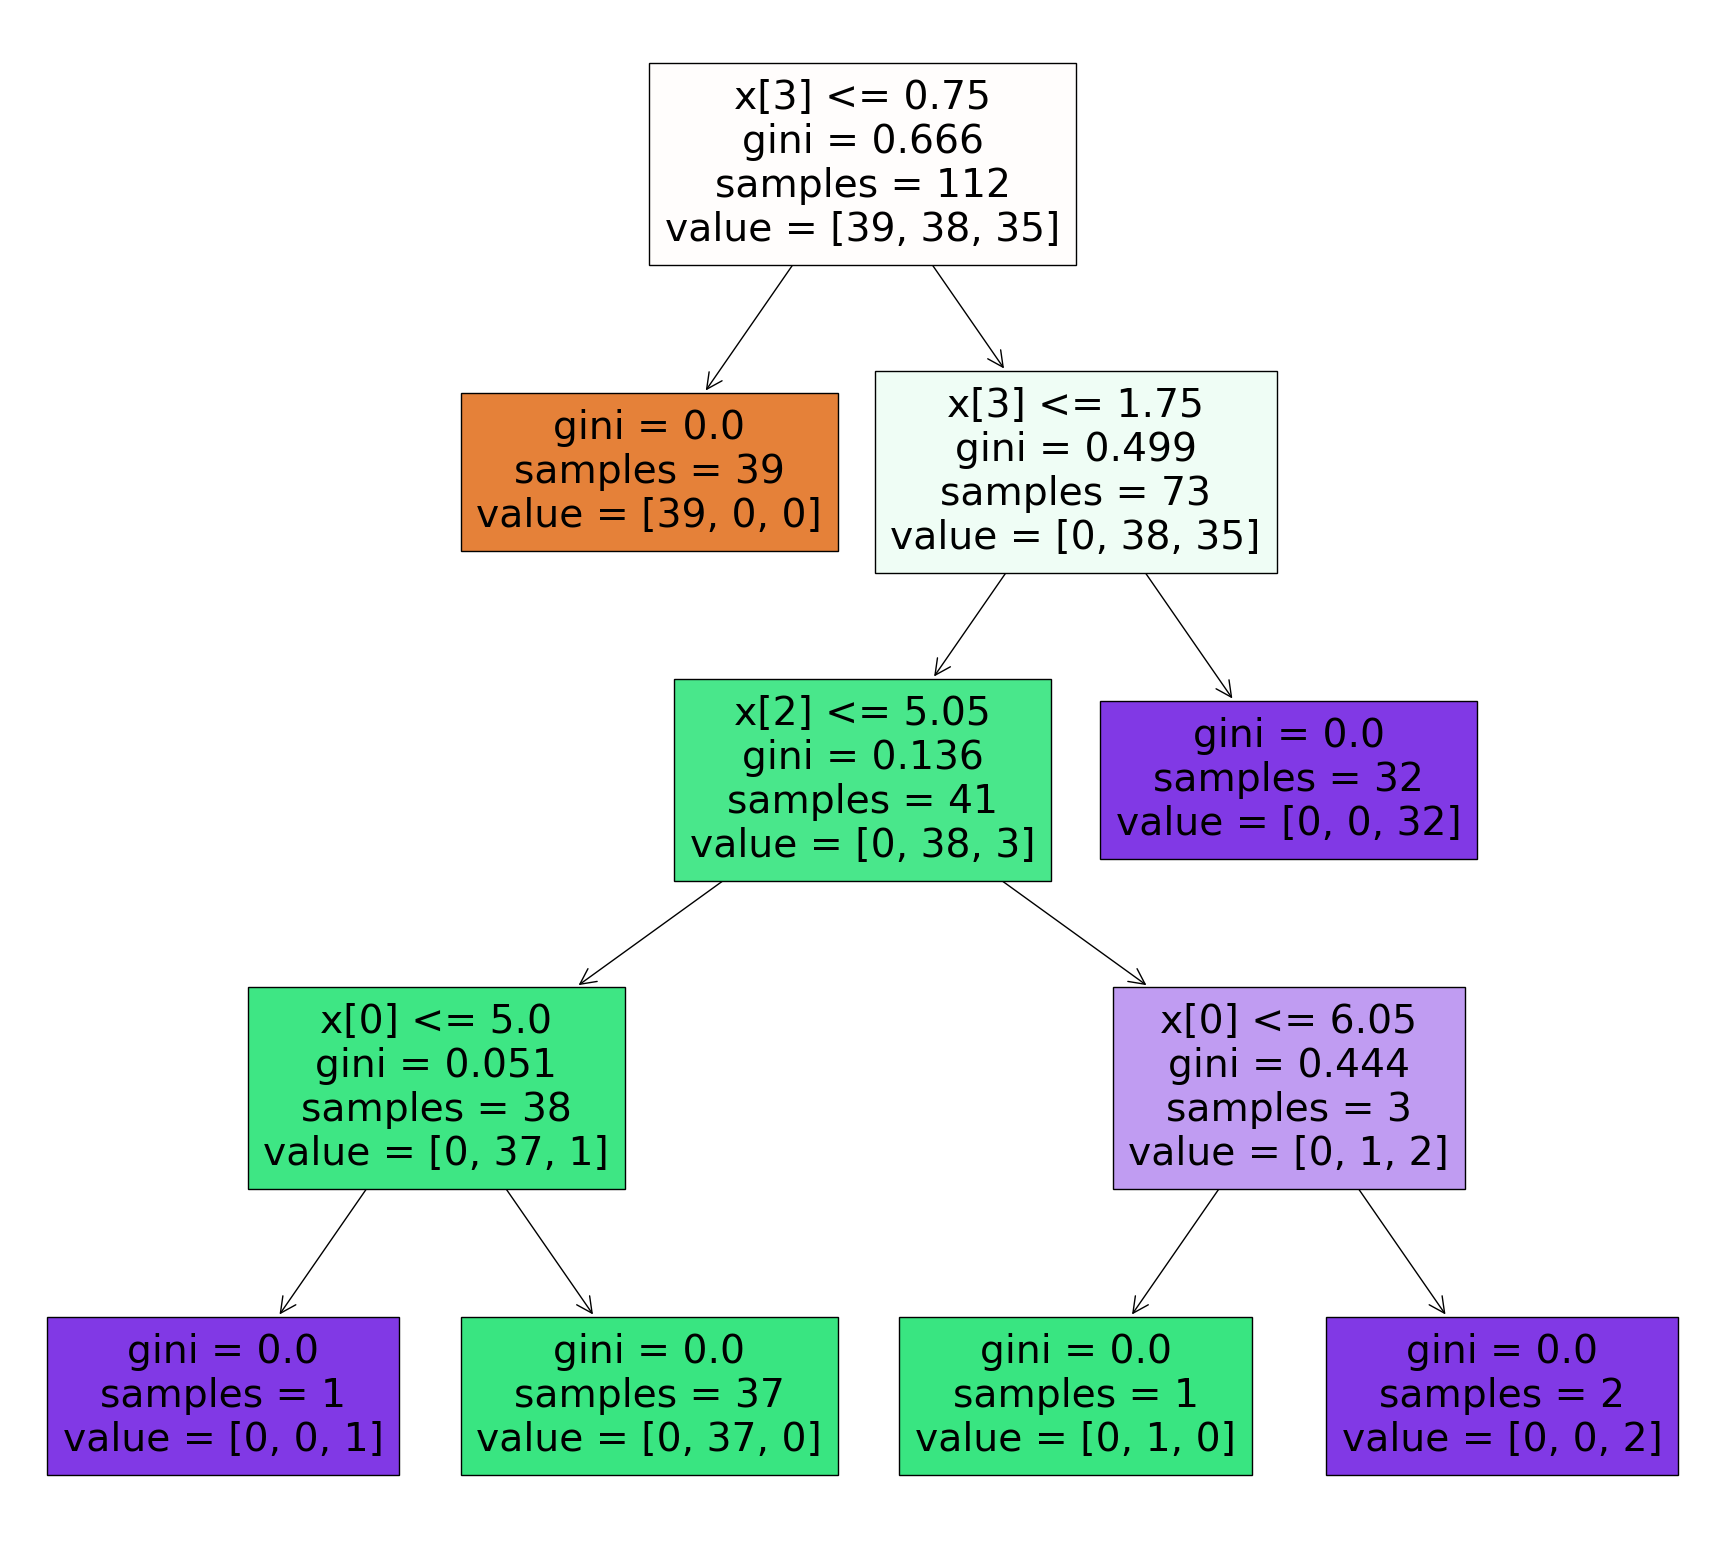

In [30]:
#overfitted tree
plt.figure(figsize=(22,20))
tree.plot_tree(model,filled=True)

[Text(0.4, 0.875, 'x[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [39, 38, 35]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.625, 'x[3] <= 1.75\ngini = 0.499\nsamples = 73\nvalue = [0, 38, 35]'),
 Text(0.4, 0.375, 'x[2] <= 5.05\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.2, 0.125, 'gini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.6, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

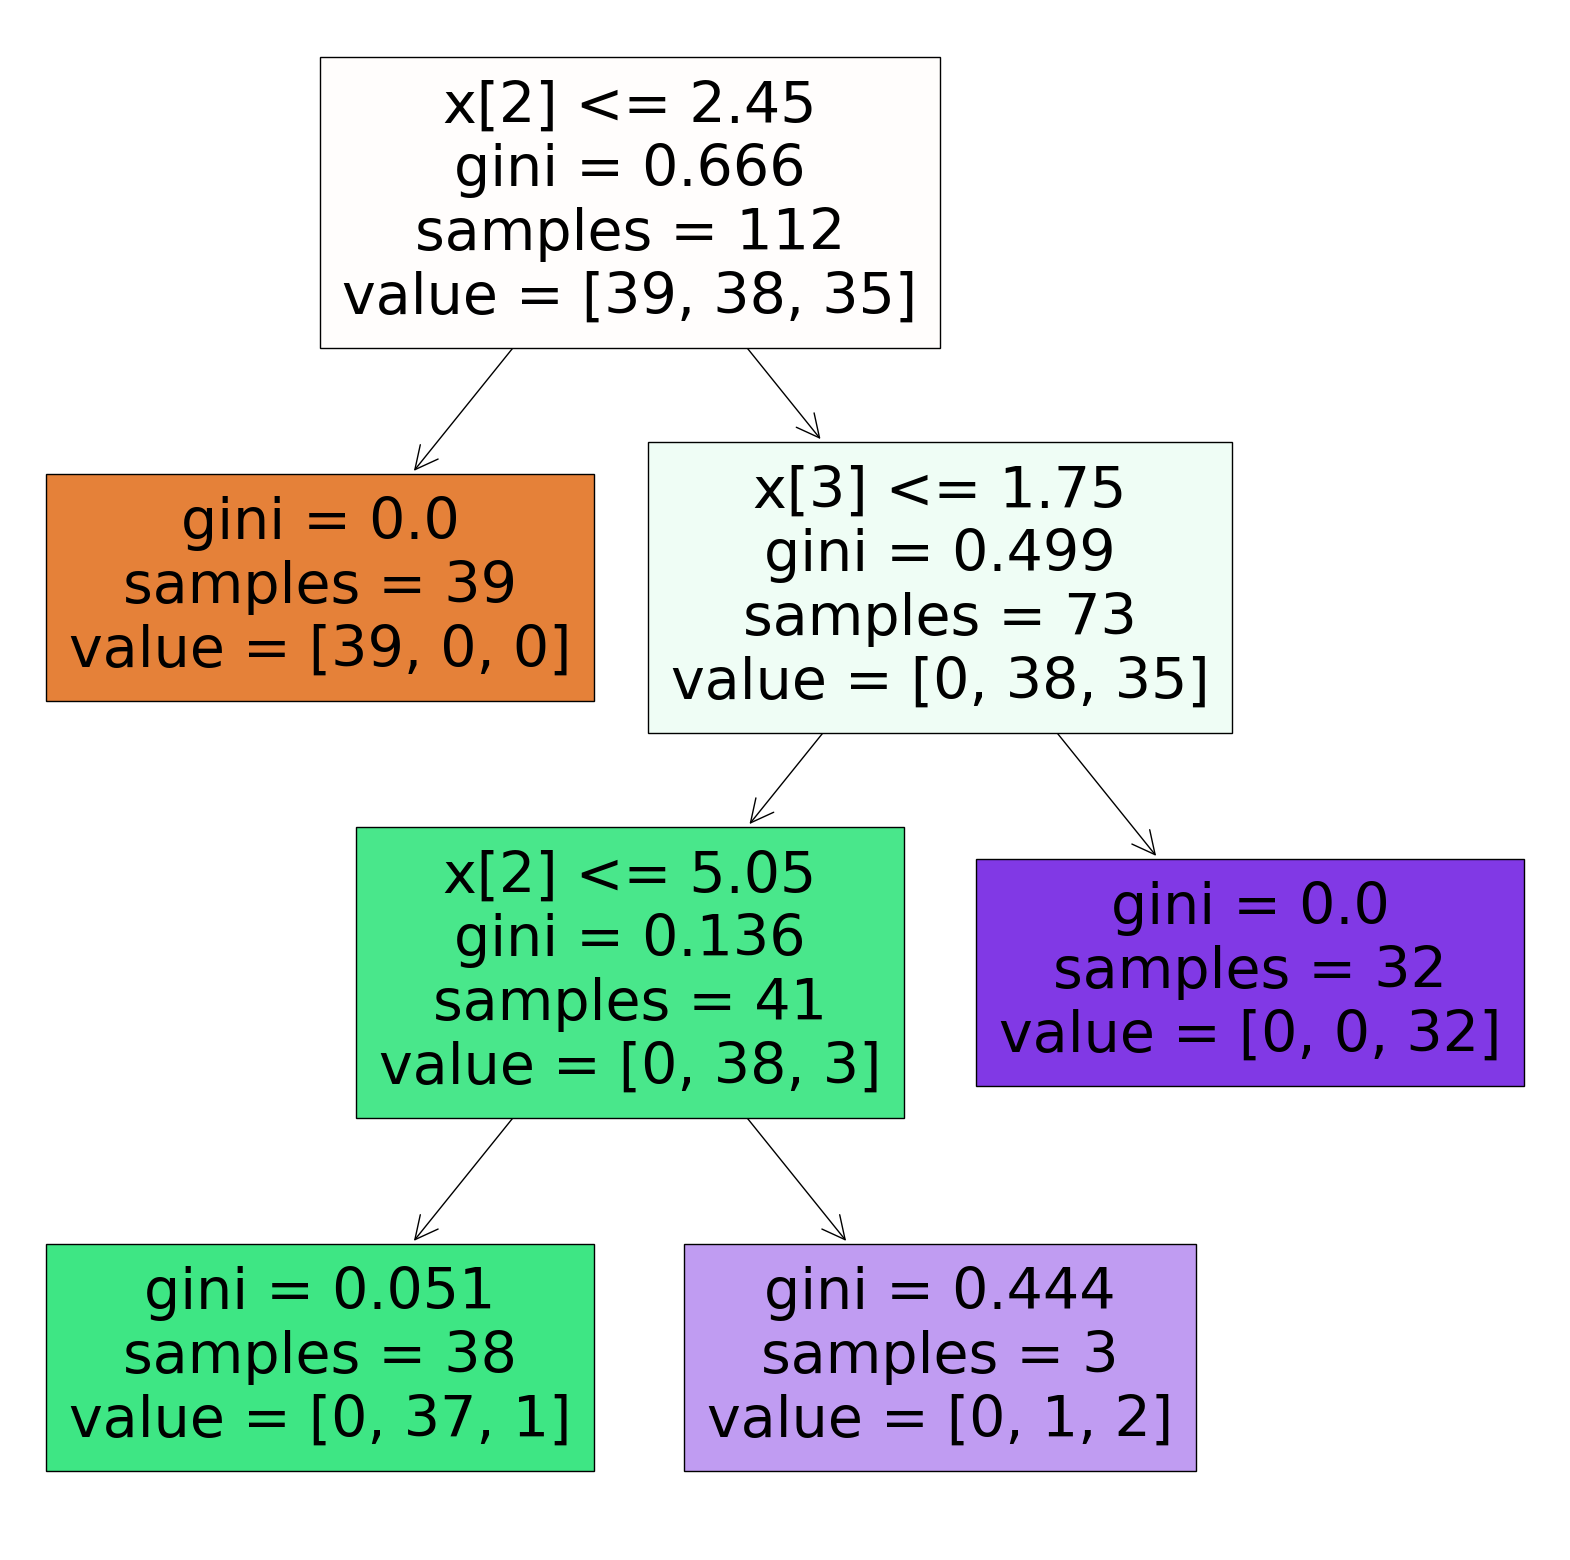

In [31]:
#best tree
plt.figure(figsize=(20,20))
tree.plot_tree(model2,filled=True)